In [92]:
!pip install mlxtend

In [93]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [94]:
%cd '/content/drive/MyDrive'
%ls

/content/drive/MyDrive
 Colab_Dataset/      Curve1.csv  'Customer Survey.xlsx'   HB2_dataset_raw.csv
'Colab Notebooks'/   Curve2.csv   HB1_dataset_raw.csv     K2D-Regular.ttf


In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

import matplotlib as mpl
mpl.font_manager.fontManager.addfont('K2D-Regular.ttf')
mpl.rc('font', family='K2D', size=12, weight=200)

In [96]:
%ls

 Colab_Dataset/      Curve1.csv  'Customer Survey.xlsx'   HB2_dataset_raw.csv
'Colab Notebooks'/   Curve2.csv   HB1_dataset_raw.csv     K2D-Regular.ttf


In [97]:
filename = 'Customer Survey.xlsx'
df = pd.read_excel(filename)
print(df.shape)
df.head(10)

(44, 64)


,Unnamed: 0,ประทับเวลา,Transaction,จักรยานเสือภูเขา,คอลลาเจน,Brownie อวกาศ,แม่โขง,Botox,กัญชา,กัญชง,เครื่องวัดความดัน,หลอดไฟเปลี่ยนสีได้,คอร์ส bikini wax,เก้าอี้นวดไฟฟ้า,ต้นไม้ประดับห้อง,หมอนข้าง,ตาชั่ง,คอร์สโบท็อกกราม,แสงโสม,กะหรี่(ปั๊บ),Lego,แฟน ที่แปลว่าพัดลม,ยาดอง,ชุดนอนไม่ได้นอน,ที่ยกน้ำหนัก (Dumbell),เครื่องดูดฝุ่นอัตโนมัติ (robot),เนื้อวากิล,หมูแดดเดียว,drone,เครื่องย่อยเศษอาหาร,เสื้อซีทรู,ไพ่ยิปซี,เนื้อย่าง,เครื่องทำลายเอกสาร,กระเป๋า,ชาบู,Surfskate,Board game,เครื่องย่อยเศษอาหาร.1,ชุดน้องหมา,Omakase,เม็ดมะม่วงหิมพานต์,ไฟอัจฉริยะ,บัตตาเลี่ยนที่ตัดผม,ไดร์เป่าผม Dyson,แผ่นเสียง,กรรไกรตัดขนจมูก,PS5,เครื่องตรวจน้ำตาลในเลือด,โรตี,กะปิดอง,น้องหมา,แพ็คเกจไทยเที่ยวไทย,เกมส์ FIFA Online,มะม่วงเบา,ห้องน้ำแมวอัตโนมัติ,กระเป๋า chanel,ข้าวขาหมูคากิคาจักออนไลน์,ถั่งเช่า,หมอนสุขภาพสำหรับคนนอนไม่หลับ,อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,น้ำส้มดีโด้,Software ถูกลิขสิทธิ์,ครีมกันแดด
0,2021-03-20,11:53:45,1,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย
1,2021-03-20,11:54:01,2,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย
2,2021-03-20,11:54:05,3,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย,เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย
3,2021-03-20,11:54:13,4,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,เคย,ไม่เคย,เคย,เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย
4,2021-03-20,11:54:18,5,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,NaN,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย
5,2021-03-20,11:54:21,6,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,NaN,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย
6,2021-03-20,11:54:34,7,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย
7,2021-03-20,11:54:40,8,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,NaN,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,NaN,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย
8,2021-03-20,11:54:46,9,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย

In [98]:
missing = df.isnull().sum()
print(missing)

Unnamed: 0                       0
ประทับเวลา                       0
Transaction                      0
จักรยานเสือภูเขา                 0
คอลลาเจน                         0
                                ..
หมอนสุขภาพสำหรับคนนอนไม่หลับ     0
อาหารแมวคลีนเพื่อสุขภาพลดหุ่น    0
น้ำส้มดีโด้                      0
Software ถูกลิขสิทธิ์            0
ครีมกันแดด                       0
Length: 64, dtype: int64


In [99]:
prep = df.iloc[:,3:].reset_index(drop=True).rename_axis('student').copy()
prep.head()


,จักรยานเสือภูเขา,คอลลาเจน,Brownie อวกาศ,แม่โขง,Botox,กัญชา,กัญชง,เครื่องวัดความดัน,หลอดไฟเปลี่ยนสีได้,คอร์ส bikini wax,เก้าอี้นวดไฟฟ้า,ต้นไม้ประดับห้อง,หมอนข้าง,ตาชั่ง,คอร์สโบท็อกกราม,แสงโสม,กะหรี่(ปั๊บ),Lego,แฟน ที่แปลว่าพัดลม,ยาดอง,ชุดนอนไม่ได้นอน,ที่ยกน้ำหนัก (Dumbell),เครื่องดูดฝุ่นอัตโนมัติ (robot),เนื้อวากิล,หมูแดดเดียว,drone,เครื่องย่อยเศษอาหาร,เสื้อซีทรู,ไพ่ยิปซี,เนื้อย่าง,เครื่องทำลายเอกสาร,กระเป๋า,ชาบู,Surfskate,Board game,เครื่องย่อยเศษอาหาร.1,ชุดน้องหมา,Omakase,เม็ดมะม่วงหิมพานต์,ไฟอัจฉริยะ,บัตตาเลี่ยนที่ตัดผม,ไดร์เป่าผม Dyson,แผ่นเสียง,กรรไกรตัดขนจมูก,PS5,เครื่องตรวจน้ำตาลในเลือด,โรตี,กะปิดอง,น้องหมา,แพ็คเกจไทยเที่ยวไทย,เกมส์ FIFA Online,มะม่วงเบา,ห้องน้ำแมวอัตโนมัติ,กระเป๋า chanel,ข้าวขาหมูคากิคาจักออนไลน์,ถั่งเช่า,หมอนสุขภาพสำหรับคนนอนไม่หลับ,อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,น้ำส้มดีโด้,Software ถูกลิขสิทธิ์,ครีมกันแดด
student,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย
1,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย
2,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย,เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย
3,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,เคย,ไม่เคย,เคย,เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย
4,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,NaN,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย


In [100]:
# Impute na -> ไม่เคย
prep.fillna('ไม่เคย', inplace=True)
prep.isna().any().sum()

0

In [101]:
prep.replace({'เคย': 1, 'ไม่เคย': 0}, inplace=True)
prep.head()

,จักรยานเสือภูเขา,คอลลาเจน,Brownie อวกาศ,แม่โขง,Botox,กัญชา,กัญชง,เครื่องวัดความดัน,หลอดไฟเปลี่ยนสีได้,คอร์ส bikini wax,เก้าอี้นวดไฟฟ้า,ต้นไม้ประดับห้อง,หมอนข้าง,ตาชั่ง,คอร์สโบท็อกกราม,แสงโสม,กะหรี่(ปั๊บ),Lego,แฟน ที่แปลว่าพัดลม,ยาดอง,ชุดนอนไม่ได้นอน,ที่ยกน้ำหนัก (Dumbell),เครื่องดูดฝุ่นอัตโนมัติ (robot),เนื้อวากิล,หมูแดดเดียว,drone,เครื่องย่อยเศษอาหาร,เสื้อซีทรู,ไพ่ยิปซี,เนื้อย่าง,เครื่องทำลายเอกสาร,กระเป๋า,ชาบู,Surfskate,Board game,เครื่องย่อยเศษอาหาร.1,ชุดน้องหมา,Omakase,เม็ดมะม่วงหิมพานต์,ไฟอัจฉริยะ,บัตตาเลี่ยนที่ตัดผม,ไดร์เป่าผม Dyson,แผ่นเสียง,กรรไกรตัดขนจมูก,PS5,เครื่องตรวจน้ำตาลในเลือด,โรตี,กะปิดอง,น้องหมา,แพ็คเกจไทยเที่ยวไทย,เกมส์ FIFA Online,มะม่วงเบา,ห้องน้ำแมวอัตโนมัติ,กระเป๋า chanel,ข้าวขาหมูคากิคาจักออนไลน์,ถั่งเช่า,หมอนสุขภาพสำหรับคนนอนไม่หลับ,อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,น้ำส้มดีโด้,Software ถูกลิขสิทธิ์,ครีมกันแดด
student,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,1,1,1,0,0,0,0,1,0,1,1,0,1,0,0,1,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1
1,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,1,1,0,1,0,1,1,1,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,1,1,1,0,1,0,1,0,0,0,1,1,0,1,0,1
2,1,0,0,0,0,0,0,1,1,0,0,1,1,1,0,0,1,1,1,0,1,1,0,1,1,1,0,1,0,1,1,1,1,1,1,0,1,0,1,1,1,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,1,0,1,1,1
3,0,0,0,1,0,1,0,0,0,0,1,1,1,1,0,1,1,1,1,1,0,0,1,1,1,0,0,0,0,1,0,1,1,0,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,1,0,1,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,1,1


In [102]:
# check unique values, and NaN
prep.melt()['value'].value_counts(dropna=False)

0    1648
1    1036
Name: value, dtype: int64

In [103]:
sorted(prep)

['Board game',
 'Botox',
 'Brownie อวกาศ',
 'Lego',
 'Omakase',
 'PS5',
 'Software ถูกลิขสิทธิ์',
 'Surfskate',
 'drone',
 'กรรไกรตัดขนจมูก',
 'กระเป๋า',
 'กระเป๋า chanel',
 'กะปิดอง',
 'กะหรี่(ปั๊บ)',
 'กัญชง',
 'กัญชา',
 'ข้าวขาหมูคากิคาจักออนไลน์',
 'ครีมกันแดด',
 'คอร์ส bikini wax',
 'คอร์สโบท็อกกราม',
 'คอลลาเจน',
 'จักรยานเสือภูเขา',
 'ชาบู',
 'ชุดนอนไม่ได้นอน',
 'ชุดน้องหมา',
 'ตาชั่ง ',
 'ต้นไม้ประดับห้อง',
 'ถั่งเช่า',
 'ที่ยกน้ำหนัก (Dumbell)',
 'น้องหมา',
 'น้ำส้มดีโด้',
 'บัตตาเลี่ยนที่ตัดผม',
 'มะม่วงเบา',
 'ยาดอง',
 'หมอนข้าง',
 'หมอนสุขภาพสำหรับคนนอนไม่หลับ',
 'หมูแดดเดียว',
 'หลอดไฟเปลี่ยนสีได้',
 'ห้องน้ำแมวอัตโนมัติ',
 'อาหารแมวคลีนเพื่อสุขภาพลดหุ่น',
 'เกมส์ FIFA Online',
 'เก้าอี้นวดไฟฟ้า',
 'เครื่องดูดฝุ่นอัตโนมัติ (robot)',
 'เครื่องตรวจน้ำตาลในเลือด',
 'เครื่องทำลายเอกสาร',
 'เครื่องย่อยเศษอาหาร',
 'เครื่องย่อยเศษอาหาร.1',
 'เครื่องวัดความดัน',
 'เนื้อย่าง',
 'เนื้อวากิล',
 'เม็ดมะม่วงหิมพานต์',
 'เสื้อซีทรู',
 'แผ่นเสียง',
 'แพ็คเกจไทยเที่ยวไทย',
 'แฟน ที่แปลว่า

In [104]:
prep.drop('เครื่องย่อยเศษอาหาร.1',axis=1, inplace=True)

In [105]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

frequent_itemsets = apriori(prep, min_support=0.5, use_colnames=True)

In [106]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(คอลลาเจน),(กะหรี่(ปั๊บ)),0.522727,0.931818,0.500000,0.956522,1.026511,0.012913,1.568182
1,(กะหรี่(ปั๊บ)),(คอลลาเจน),0.931818,0.522727,0.500000,0.536585,1.026511,0.012913,1.029904
2,(กระเป๋า),(คอลลาเจน),1.000000,0.522727,0.522727,0.522727,1.000000,0.000000,1.000000
3,(คอลลาเจน),(กระเป๋า),0.522727,1.000000,0.522727,1.000000,1.000000,0.000000,inf
4,(ชาบู),(คอลลาเจน),1.000000,0.522727,0.522727,0.522727,1.000000,0.000000,1.000000
5,(คอลลาเจน),(ชาบู),0.522727,1.000000,0.522727,1.000000,1.000000,0.000000,inf
6,(โรตี),(คอลลาเจน),0.954545,0.522727,0.522727,0.547619,1.047619,0.023760,1.055024
7,(คอลลาเจน),(โรตี),0.522727,0.954545,0.522727,1.000000,1.047619,0.023760,inf
8,(ครีมกันแดด),(คอลลาเจน),1.000000,0.522727,0.522727,0.522727,1.000000,0.000000,1.000000
9,(คอลลาเจน),(ครีมกันแดด),0.522727,1.000000,0.522727,1.000000,1.000000,0.000000,inf


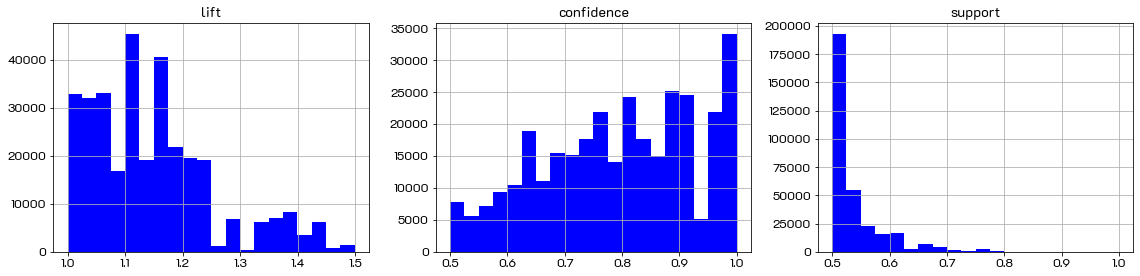

In [107]:
fig, axes = plt.subplots(1, 3, figsize=(16,4), tight_layout=True)
for var, ax in zip(['lift','confidence','support'], axes):
    rules[var].hist(bins=20, ax=ax, color='blue')
    ax.set_title(var)
plt.show()

In [108]:
rules[ (rules['lift'] >= 1.00) &
       (rules['confidence'] >= 0.6) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(คอลลาเจน),(กะหรี่(ปั๊บ)),0.522727,0.931818,0.500000,0.956522,1.026511,0.012913,1.568182
3,(คอลลาเจน),(กระเป๋า),0.522727,1.000000,0.522727,1.000000,1.000000,0.000000,inf
5,(คอลลาเจน),(ชาบู),0.522727,1.000000,0.522727,1.000000,1.000000,0.000000,inf
7,(คอลลาเจน),(โรตี),0.522727,0.954545,0.522727,1.000000,1.047619,0.023760,inf
9,(คอลลาเจน),(ครีมกันแดด),0.522727,1.000000,0.522727,1.000000,1.000000,0.000000,inf
...,...,...,...,...,...,...,...,...,...
322269,"(เม็ดมะม่วงหิมพานต์, เนื้อวากิล)","(หมูแดดเดียว, โรตี, เนื้อย่าง, ชาบู, ครีมกันแด...",0.636364,0.545455,0.500000,0.785714,1.440476,0.152893,2.121212
322270,(หมูแดดเดียว),"(โรตี, เนื้อย่าง, ชาบู, แฟน ที่แปลว่าพัดลม, คร...",0.795455,0.545455,0.500000,0.628571,1.152381,0.066116,1.223776
322272,(เนื้อย่าง),"(หมูแดดเดียว, โรตี, ชาบู, แฟน ที่แปลว่าพัดลม, ...",0.704545,0.522727,0.500000,0.709677,1.357644,0.131715,1.643939
322274,(แฟน ที่แปลว่าพัดลม),"(หมูแดดเดียว, โรตี, เนื้อย่าง, ชาบู, ครีมกันแด...",0.818182,0.545455,0.500000,0.611111,1.120370,0.053719,1.168831


In [109]:
simple_rules = rules[(rules['antecedents'].apply(len) == 1) & (rules['consequents'].apply(len) == 1) & (rules['lift'] > 1.00) & (rules['confidence'] > 0.6)]
print(simple_rules.shape)
simple_rules.sort_values('lift', ascending=False).head(20)

(125, 9)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
156,(เนื้อย่าง),(เนื้อวากิล),0.704545,0.659091,0.636364,0.903226,1.370412,0.172004,3.522727
157,(เนื้อวากิล),(เนื้อย่าง),0.659091,0.704545,0.636364,0.965517,1.370412,0.172004,8.568182
16,(Lego),(ต้นไม้ประดับห้อง),0.613636,0.704545,0.522727,0.851852,1.209080,0.090393,1.994318
17,(ต้นไม้ประดับห้อง),(Lego),0.704545,0.613636,0.522727,0.741935,1.209080,0.090393,1.497159
98,(Lego),(เนื้อย่าง),0.613636,0.704545,0.500000,0.814815,1.156511,0.067665,1.595455
99,(เนื้อย่าง),(Lego),0.704545,0.613636,0.500000,0.709677,1.156511,0.067665,1.330808
155,(เนื้อวากิล),(หมูแดดเดียว),0.659091,0.795455,0.590909,0.896552,1.127094,0.066632,1.977273
154,(หมูแดดเดียว),(เนื้อวากิล),0.795455,0.659091,0.590909,0.742857,1.127094,0.066632,1.325758
167,(Software ถูกลิขสิทธิ์),(เนื้อวากิล),0.772727,0.659091,0.568182,0.735294,1.115619,0.058884,1.287879
166,(เนื้อวากิล),(Software ถูกลิขสิทธิ์),0.659091,0.772727,0.568182,0.862069,1.115619,0.058884,1.647727


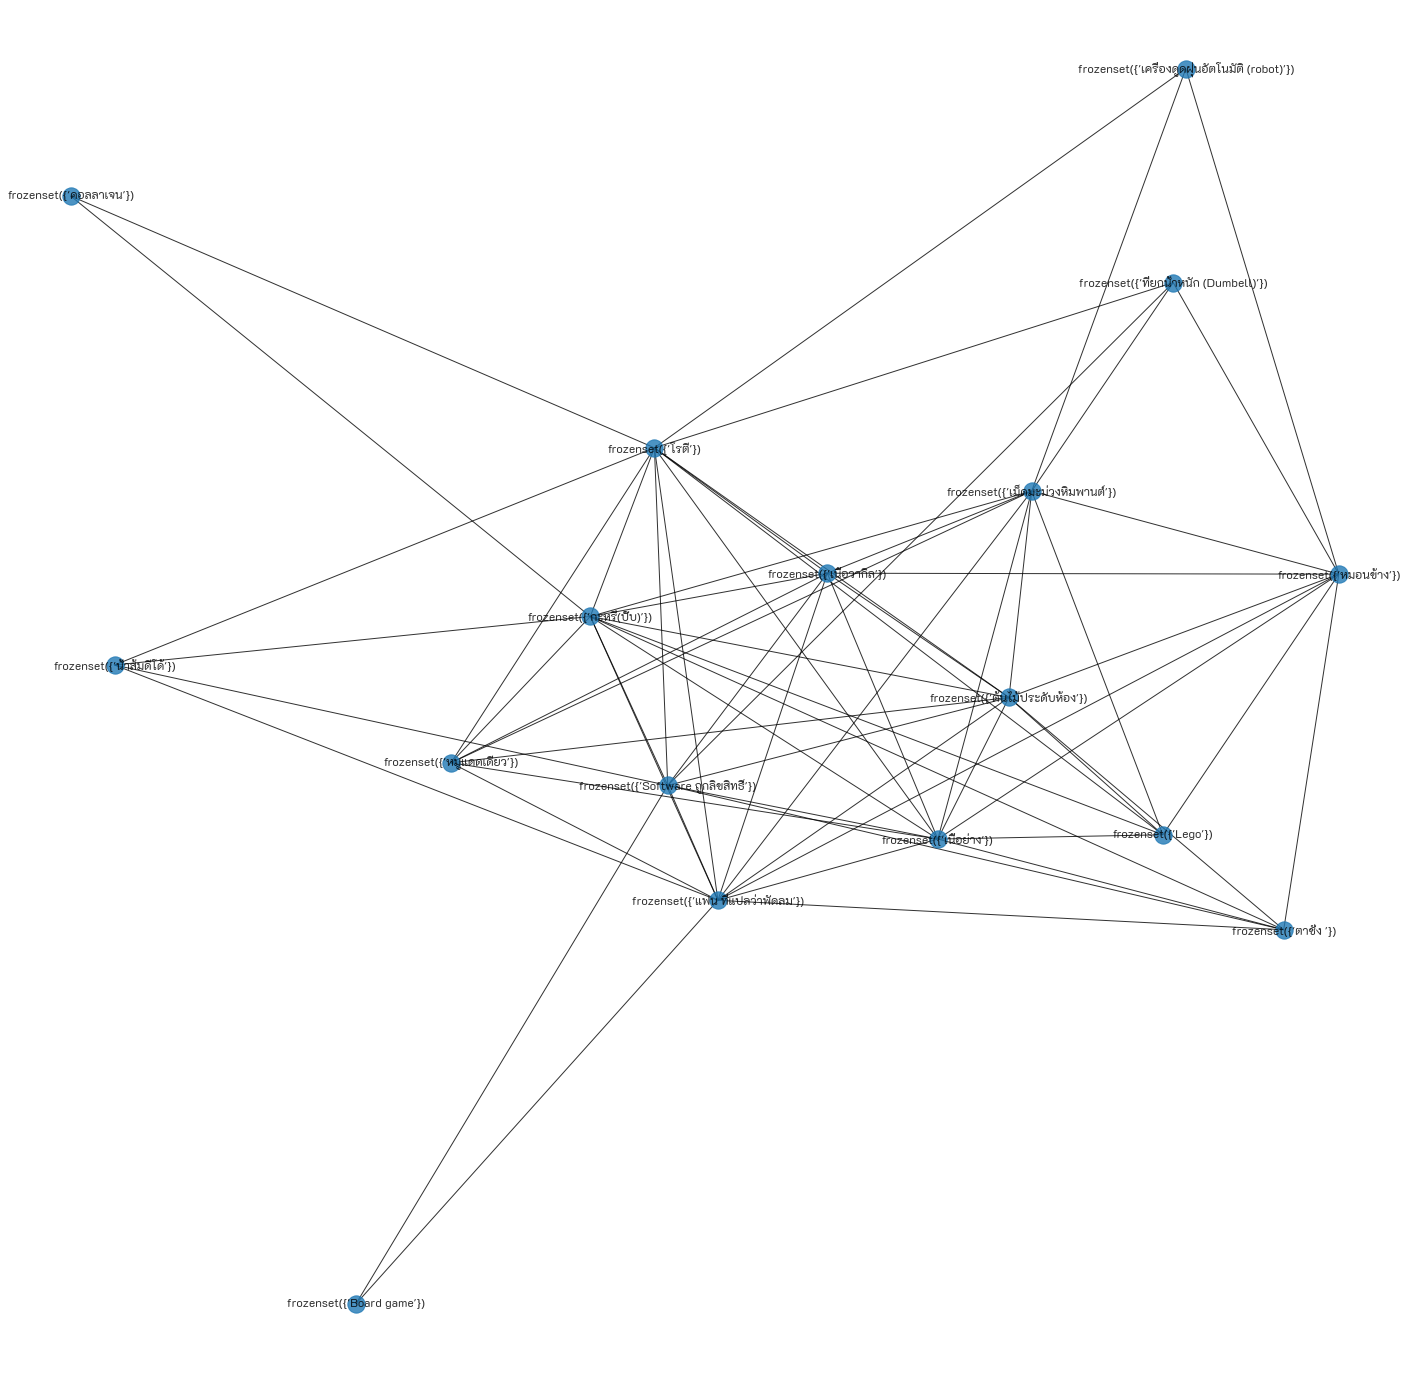

In [110]:
import networkx as nx
import matplotlib.font_manager as fm


fig, ax=plt.subplots(figsize=(25,25))
GA=nx.from_pandas_edgelist(simple_rules,source='antecedents',target='consequents')
labels_params = {'font_family': 'K2D', 'alpha':.8, 'font_size':12}

nx.draw(GA,with_labels=True,**labels_params)
plt.show()

In [111]:
item_item_matrix = pd.DataFrame(index=prep.columns,columns=prep.columns)

In [112]:
from scipy.spatial.distance import cosine

for i in range(0,len(item_item_matrix.columns)) :
    # Loop through the columns for each column
    for j in range(0,len(item_item_matrix.columns)) :
      # Fill in placeholder with cosine similarities
      item_item_matrix.iloc[i,j] = 1 -cosine(prep.iloc[:,i],prep.iloc[:,j])

In [113]:
links = item_item_matrix.rename_axis('related item', 
                                     axis='columns').stack().reset_index()
links.columns = ['item', 'related item','value']

In [114]:
links

,item,related item,value
0,จักรยานเสือภูเขา,จักรยานเสือภูเขา,1
1,จักรยานเสือภูเขา,คอลลาเจน,0.573415
2,จักรยานเสือภูเขา,Brownie อวกาศ,0.33541
3,จักรยานเสือภูเขา,แม่โขง,0.400892
4,จักรยานเสือภูเขา,Botox,0.416667
...,...,...,...
3595,ครีมกันแดด,หมอนสุขภาพสำหรับคนนอนไม่หลับ,0.621582
3596,ครีมกันแดด,อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,0.261116
3597,ครีมกันแดด,น้ำส้มดีโด้,0.811844
3598,ครีมกันแดด,Software ถูกลิขสิทธิ์,0.879049


In [115]:
links_filtered=links.loc[ (links['value'] > 0.1) & (links['value'] > 0.7) &
                         (links['item'] != links['related item']) ]

In [116]:
links_filtered

,item,related item,value
76,คอลลาเจน,กะหรี่(ปั๊บ),0.716419
91,คอลลาเจน,กระเป๋า,0.722999
92,คอลลาเจน,ชาบู,0.722999
105,คอลลาเจน,โรตี,0.740013
119,คอลลาเจน,ครีมกันแดด,0.722999
...,...,...,...
3574,ครีมกันแดด,Board game,0.797724
3577,ครีมกันแดด,เม็ดมะม่วงหิมพานต์,0.953463
3585,ครีมกันแดด,โรตี,0.977008
3597,ครีมกันแดด,น้ำส้มดีโด้,0.811844


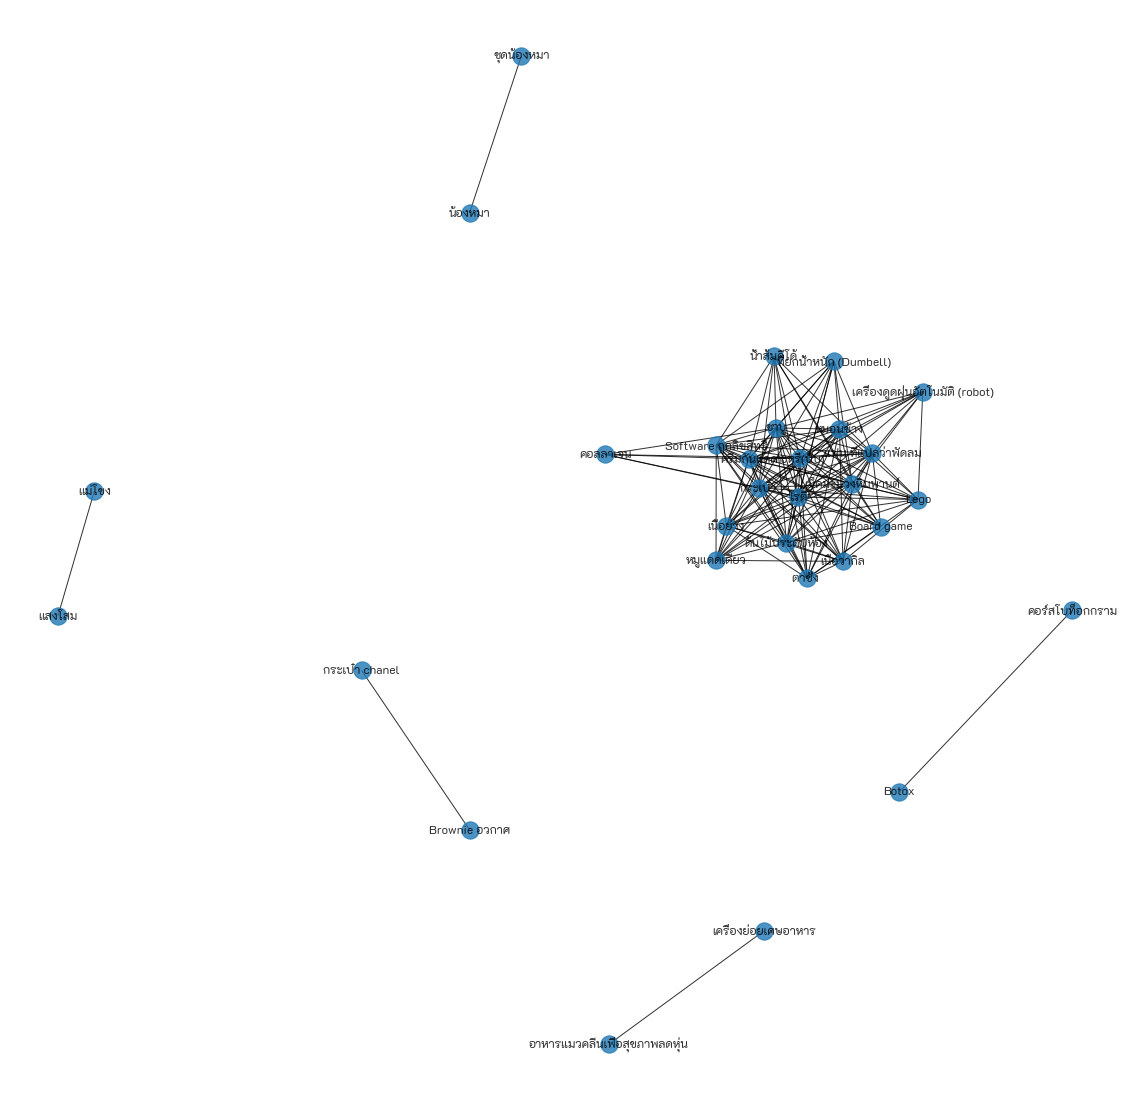

In [117]:
import matplotlib.pyplot as plt
import networkx as nx

fig, ax=plt.subplots(figsize=(20,20))
GA=nx.from_pandas_edgelist(links_filtered,source='item',target='related item')
labels_params = {'font_family': 'K2D', 'alpha':.8, 'font_size':12}
nx.draw(GA,with_labels=True,**labels_params,pos=nx.spring_layout(GA, k=0.5, iterations=40))
plt.show()